In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [ ]:
classes = pd.read_excel("mplus_analysis/LPA_mplus_results.xlsx", sheet_name="WEEKEND")
indicator_results = pd.read_excel("mplus_analysis/LPA_mplus_results.xlsx", sheet_name="indicator_results")
covariate_results = pd.read_excel("mplus_analysis/LPA_mplus_results.xlsx", sheet_name="covariate_results")

# class enumeration

In [73]:
classes = classes[["k", "Log-likelihood", "AIC", "BIC", "SABIC", "Entropy", "LMR adjusted p-value", "Class Size"]].round(2)
print(classes.to_latex())

\begin{tabular}{lrrrrrrrl}
\toprule
 & k & Log-likelihood & AIC & BIC & SABIC & Entropy & LMR adjusted p-value & Class Size \\
\midrule
0 & 1 & -35866.880000 & 71777.750000 & 71910.960000 & 71841.060000 & NaN & NaN & 100 \\
1 & 2 & -34336.420000 & 68750.840000 & 68986.990000 & 68863.070000 & 0.960000 & 0.000000 & 82, 18 \\
2 & 3 & -33491.610000 & 67095.210000 & 67434.300000 & 67256.360000 & 0.970000 & 0.000000 & 78, 19,2 \\
3 & 4 & -32088.590000 & 64323.190000 & 64765.220000 & 64533.260000 & 0.980000 & 0.000000 & 65, 18, 15, 2 \\
4 & 5 & -31153.890000 & 62487.780000 & 63032.740000 & 62746.770000 & 0.990000 & 0.000000 & 62, 14, 11, 11, 2 \\
5 & 6 & -30802.450000 & 61818.900000 & 62466.800000 & 62126.820000 & 0.970000 & 0.000000 & 57,14,11,11,5,2 \\
\bottomrule
\end{tabular}



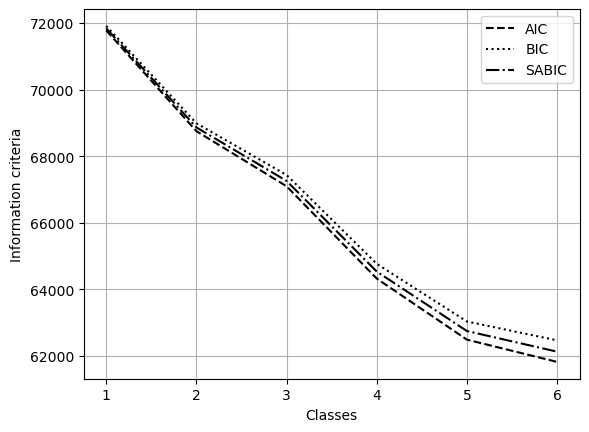

In [5]:
plt.plot(classes.k, classes.AIC, '--', label="AIC", color="black")
plt.plot(classes.k, classes.BIC, ':', label="BIC", color="black")
plt.plot(classes.k, classes.SABIC, '-.', label="SABIC", color="black")
# plt.title("Information Criteria Comparison Between Classes")
plt.ylabel("Information criteria")
plt.xlabel("Classes")
plt.legend()
plt.grid()

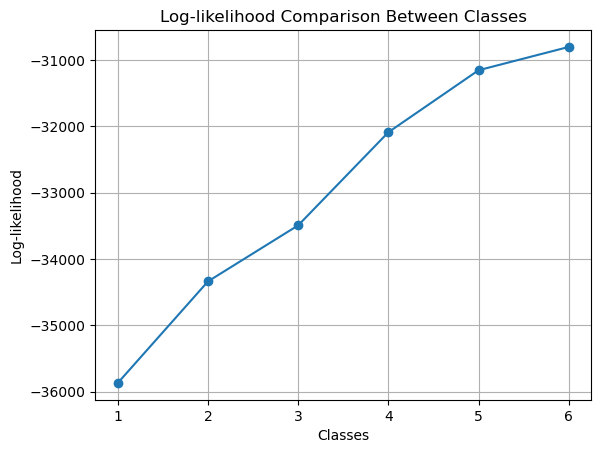

In [6]:
plt.plot(classes.k, classes["Log-likelihood"], '-o')
plt.title("Log-likelihood Comparison Between Classes")
plt.ylabel("Log-likelihood")
plt.xlabel("Classes")
plt.grid()

## some tables here
### Indicator table

In [48]:
indicator_results = indicator_results.set_index(indicator_results.columns[0]).round(2)
indicator_results

,c1_mean,c1_p,c2_mean,c2_p,c3_mean,c3_p,c4_mean,c4_p
Unnamed: 0,,,,,,,,
Fast Food,0.50,0.00,0.00,0.00,0.22,0.00,1.00,0.00
Price,1.44,0.00,1.82,0.00,1.70,0.00,1.14,0.00
Rating,3.16,0.00,3.79,0.00,3.64,0.00,2.49,0.00
Diversity,2.35,0.00,2.76,0.00,4.19,0.00,1.18,0.00
Travel time,1.40,0.00,1.36,0.00,1.18,0.00,1.52,0.00
Restaurant trip ratio,0.53,0.00,0.52,0.00,0.51,0.00,0.79,0.00
SOV,-0.29,0.01,-0.26,0.00,-0.52,0.00,-0.28,0.37
Walk,-0.21,0.06,0.36,0.00,-0.05,0.62,0.06,0.84
Transit,-2.32,0.00,-2.04,0.00,-2.50,0.00,-1.81,0.00


In [49]:
def add_stars(mean, p):
    if p<=0.05:
        return str(mean)+"*"
    # elif p<=0.1:
    #     return str(mean)+"*"
    else:
        return str(mean)
    
def add_stars_str(mean, p):
    if p=='y':
        return str(mean)+"*"
    # elif p<=0.1:
    #     return str(mean)+"*"
    else:
        return str(mean)

def significance_4(row):
    c1_format = add_stars(row.c1_mean, row.c1_p)
    c2_format = add_stars(row.c2_mean, row.c2_p)
    c3_format = add_stars(row.c3_mean, row.c3_p)
    c4_format = add_stars(row.c4_mean, row.c4_p)
    return pd.Series([c1_format, c2_format, c3_format, c4_format])

def significance_3(row):
    c1_format = add_stars_str(row.c1_or, row.c1_p)
    c2_format = add_stars_str(row.c2_or, row.c2_p)
    c3_format = add_stars_str(row.c4_or, row.c4_p)
    return pd.Series([c1_format, c2_format, c3_format])

In [50]:
indicator_results[["c1", "c2", "c3", "c4"]] = indicator_results.apply(significance_4, axis=1)
indicator_results

,c1_mean,c1_p,c2_mean,c2_p,c3_mean,c3_p,c4_mean,c4_p,c1,c2,c3,c4
Unnamed: 0,,,,,,,,,,,,
Fast Food,0.50,0.00,0.00,0.00,0.22,0.00,1.00,0.00,0.5*,0.0*,0.22*,1.0*
Price,1.44,0.00,1.82,0.00,1.70,0.00,1.14,0.00,1.44*,1.82*,1.7*,1.14*
Rating,3.16,0.00,3.79,0.00,3.64,0.00,2.49,0.00,3.16*,3.79*,3.64*,2.49*
Diversity,2.35,0.00,2.76,0.00,4.19,0.00,1.18,0.00,2.35*,2.76*,4.19*,1.18*
Travel time,1.40,0.00,1.36,0.00,1.18,0.00,1.52,0.00,1.4*,1.36*,1.18*,1.52*
Restaurant trip ratio,0.53,0.00,0.52,0.00,0.51,0.00,0.79,0.00,0.53*,0.52*,0.51*,0.79*
SOV,-0.29,0.01,-0.26,0.00,-0.52,0.00,-0.28,0.37,-0.29*,-0.26*,-0.52*,-0.28
Walk,-0.21,0.06,0.36,0.00,-0.05,0.62,0.06,0.84,-0.21,0.36*,-0.05,0.06
Transit,-2.32,0.00,-2.04,0.00,-2.50,0.00,-1.81,0.00,-2.32*,-2.04*,-2.5*,-1.81*


In [51]:
indicator_formatted = indicator_results[["c1", "c2", "c3", "c4"]]
indicator_formatted

,c1,c2,c3,c4
Unnamed: 0,,,,
Fast Food,0.5*,0.0*,0.22*,1.0*
Price,1.44*,1.82*,1.7*,1.14*
Rating,3.16*,3.79*,3.64*,2.49*
Diversity,2.35*,2.76*,4.19*,1.18*
Travel time,1.4*,1.36*,1.18*,1.52*
Restaurant trip ratio,0.53*,0.52*,0.51*,0.79*
SOV,-0.29*,-0.26*,-0.52*,-0.28
Walk,-0.21,0.36*,-0.05,0.06
Transit,-2.32*,-2.04*,-2.5*,-1.81*


In [52]:
indicator_latex = indicator_formatted.to_latex()
print(indicator_latex)

\begin{tabular}{lllll}
\toprule
 & c1 & c2 & c3 & c4 \\
Unnamed: 0 &  &  &  &  \\
\midrule
Fast Food & 0.5* & 0.0* & 0.22* & 1.0* \\
Price & 1.44* & 1.82* & 1.7* & 1.14* \\
Rating & 3.16* & 3.79* & 3.64* & 2.49* \\
Diversity & 2.35* & 2.76* & 4.19* & 1.18* \\
Travel time & 1.4* & 1.36* & 1.18* & 1.52* \\
Restaurant trip ratio & 0.53* & 0.52* & 0.51* & 0.79* \\
SOV & -0.29* & -0.26* & -0.52* & -0.28 \\
Walk & -0.21 & 0.36* & -0.05 & 0.06 \\
Transit & -2.32* & -2.04* & -2.5* & -1.81* \\
Shop & -0.42 & -0.53* & -1.15* & -1.5* \\
Home & 1.4* & 1.58* & 1.54* & 1.12* \\
Errand & 0.51* & 0.13 & -0.03 & 0.14 \\
School/Work & 1.12* & 1.08* & 0.76* & 0.98* \\
Breakfast & -1.63* & -1.54* & -1.93* & -1.52* \\
Lunch & 0.42* & 0.26* & 0.23* & 0.33 \\
Other & 0.35* & 0.08 & 0.02 & 0.32 \\
\bottomrule
\end{tabular}



### Covariate Table

In [54]:
covariate_results = covariate_results.round(2).set_index(covariate_results.columns[0])
covariate_results

,c1_or,c1_p,c2_or,c2_p,c4_or,c4_p
Unnamed: 0,,,,,,
Employee density,1.00,n,1.00,n,1.00,n
Median income ($),1.00,n,1.00,y,1.00,n
Distance from home (mi),1.01,n,1.01,n,1.02,n
Food desert,1.23,n,2.04,y,1.30,n
Number of children,1.22,y,1.04,n,1.04,n
Vehicle ratio,1.32,y,1.09,n,0.71,n
<=15 yrs,1.24,n,1.95,y,0.98,n
16-25 yrs,1.15,n,2.13,y,0.91,n
26-45 yrs,1.42,n,1.90,y,0.55,n


In [55]:
# covariate_results["c1_odds"] = round(np.exp(covariate_results["c1_logodds"]), 3)
# covariate_results["c2_odds"] = round(np.exp(covariate_results["c2_logodds"]), 3)
# covariate_results["c3_odds"] = round(np.exp(covariate_results["c3_logodds"]), 3)
# covariate_results

In [56]:
covariate_results[["c1", "c2", "c3"]] = covariate_results.apply(significance_3, axis=1)
covariate_results

,c1_or,c1_p,c2_or,c2_p,c4_or,c4_p,c1,c2,c3
Unnamed: 0,,,,,,,,,
Employee density,1.00,n,1.00,n,1.00,n,1.0,1.0,1.0
Median income ($),1.00,n,1.00,y,1.00,n,1.0,1.0*,1.0
Distance from home (mi),1.01,n,1.01,n,1.02,n,1.01,1.01,1.02
Food desert,1.23,n,2.04,y,1.30,n,1.23,2.04*,1.3
Number of children,1.22,y,1.04,n,1.04,n,1.22*,1.04,1.04
Vehicle ratio,1.32,y,1.09,n,0.71,n,1.32*,1.09,0.71
<=15 yrs,1.24,n,1.95,y,0.98,n,1.24,1.95*,0.98
16-25 yrs,1.15,n,2.13,y,0.91,n,1.15,2.13*,0.91
26-45 yrs,1.42,n,1.90,y,0.55,n,1.42,1.9*,0.55


In [57]:
covariate_formatted = covariate_results[["c1", "c2", "c3"]]
covariate_formatted

,c1,c2,c3
Unnamed: 0,,,
Employee density,1.0,1.0,1.0
Median income ($),1.0,1.0*,1.0
Distance from home (mi),1.01,1.01,1.02
Food desert,1.23,2.04*,1.3
Number of children,1.22*,1.04,1.04
Vehicle ratio,1.32*,1.09,0.71
<=15 yrs,1.24,1.95*,0.98
16-25 yrs,1.15,2.13*,0.91
26-45 yrs,1.42,1.9*,0.55


In [58]:
covariate_latex = covariate_formatted.to_latex()
print(covariate_latex)

\begin{tabular}{llll}
\toprule
 & c1 & c2 & c3 \\
Unnamed: 0 &  &  &  \\
\midrule
Employee density & 1.0 & 1.0 & 1.0 \\
Median income ($) & 1.0 & 1.0* & 1.0 \\
Distance from home (mi) & 1.01 & 1.01 & 1.02 \\
Food desert & 1.23 & 2.04* & 1.3 \\
Number of children & 1.22* & 1.04 & 1.04 \\
Vehicle ratio & 1.32* & 1.09 & 0.71 \\
<=15 yrs & 1.24 & 1.95* & 0.98 \\
16-25 yrs & 1.15 & 2.13* & 0.91 \\
26-45 yrs & 1.42 & 1.9* & 0.55 \\
46-65 yrs & 1.22 & 1.63 & 0.71 \\
Female & 1.03 & 0.88 & 1.16 \\
Race: White & 1.11 & 1.0 & 0.6 \\
Asian & 0.82 & 0.89 & 0.58 \\
 Hispanic & 1.72* & 1.34 & 0.52 \\
 Black & 1.0 & 0.91 & 0.23 \\
 <$35k & 1.2 & 1.09 & 1.39 \\
Income: $35-75k & 1.01 & 1.16 & 1.23 \\
 $75-150k & 1.08 & 1.17 & 1.19 \\
 Full-time & 0.82 & 1.29 & 1.47 \\
Part-time & 0.85 & 1.47 & 1.28 \\
Homemaker & 0.94 & 1.14 & 3.17* \\
\bottomrule
\end{tabular}



# Summary statistics

In [74]:
lca_data = pd.read_csv("lca_data.csv")

In [75]:
lca_data = lca_data.drop(columns="Unnamed: 0", axis=1)

In [97]:
summary_stats = {}
# restaurant
summary_stats["Fast food (%)"] = "{:0.2f}".format(lca_data.pct_fast_food.mean())
summary_stats["Average price"] = "{:0.2f}".format(lca_data.med_price.mean())
summary_stats["Average rating"] = "{:0.2f}".format(lca_data.med_rating.mean())
summary_stats["Average diversity"] = "{:0.2f}".format(lca_data.diversity_food_cat.mean())

# travel beh
summary_stats["Average travel time"] = "{:0.2f}".format(lca_data.travel_time.mean())
summary_stats["Average restaurant ratio"] = "{:0.2f}".format(lca_data.rest_nonrest_trips.mean())
summary_stats["HOV"] = "{:0.2f}".format(sum(lca_data["mode"]==5)/len(lca_data)*100)+"%"
summary_stats["SOV"] = "{:0.2f}".format(sum(lca_data["mode"]==1)/len(lca_data)*100)+"%"
summary_stats["Walk"] = "{:0.2f}".format(sum(lca_data["mode"]==2)/len(lca_data)*100)+"%"
summary_stats["Transit"] = "{:0.2f}".format(sum(lca_data["mode"]==3)/len(lca_data)*100)+"%"
summary_stats["Shop"] = "{:0.2f}".format(sum(lca_data["trip_purp"]==1)/len(lca_data)*100)+"%"
summary_stats["Home"] = "{:0.2f}".format(sum(lca_data["trip_purp"]==2)/len(lca_data)*100)+"%"
summary_stats["Errand"] = "{:0.2f}".format(sum(lca_data["trip_purp"]==3)/len(lca_data)*100)+"%"
summary_stats["School/Work"] = "{:0.2f}".format(sum(lca_data["trip_purp"]==4)/len(lca_data)*100)+"%"
summary_stats["Social"] = "{:0.2f}".format(sum(lca_data["trip_purp"]==5)/len(lca_data)*100)+"%"
summary_stats["Breakfast"] = "{:0.2f}".format(sum(lca_data["tod"]==1)/len(lca_data)*100)+"%"
summary_stats["Lunch"] = "{:0.2f}".format(sum(lca_data["tod"]==2)/len(lca_data)*100)+"%"
summary_stats["Dinner"] = "{:0.2f}".format(sum(lca_data["tod"]==4)/len(lca_data)*100)+"%"
summary_stats["Other"] = "{:0.2f}".format(sum(lca_data["tod"]==3)/len(lca_data)*100)+"%"

# sociodems
summary_stats["<=15 yrs"] = "{:0.2f}".format(sum(lca_data["age_1"])/len(lca_data)*100)+"%"
summary_stats["16-25 yrs"] = "{:0.2f}".format(sum(lca_data["age_2"])/len(lca_data)*100)+"%"
summary_stats["26-45 yrs"] = "{:0.2f}".format(sum(lca_data["age_3"])/len(lca_data)*100)+"%"
summary_stats["46-65 yrs"] = "{:0.2f}".format(sum(lca_data["age_4"])/len(lca_data)*100)+"%"
summary_stats[">65 yrs"] = "{:0.2f}".format(sum(lca_data["age_5"])/len(lca_data)*100)+"%"

summary_stats["Female"] = "{:0.2f}".format(sum(lca_data["female"])/len(lca_data)*100)+"%"
summary_stats["Non-female"] = "{:0.2f}".format((sum(lca_data["male"])/len(lca_data)*100)+ sum(lca_data["gender_other"])/len(lca_data)*100)+"%"
# summary_stats["Gender: Other"] = "{:0.2f}".format(sum(lca_data["gender_other"])/len(lca_data)*100)+"%"

summary_stats["White"] = "{:0.2f}".format(sum(lca_data["white"])/len(lca_data)*100)+"%"
summary_stats["Asian"] = "{:0.2f}".format(sum(lca_data["asian"])/len(lca_data)*100)+"%"
summary_stats["Hispanic"] = "{:0.2f}".format(sum(lca_data["hispanic"])/len(lca_data)*100)+"%"
summary_stats["Black"] = "{:0.2f}".format(sum(lca_data["black"])/len(lca_data)*100)+"%"
summary_stats["Race_Other"] = "{:0.2f}".format(sum(lca_data["race_other"])/len(lca_data)*100)+"%"

summary_stats["<$35k"] = "{:0.2f}".format(sum(lca_data["income_1"])/len(lca_data)*100)+"%"
summary_stats["$35-75k"] = "{:0.2f}".format(sum(lca_data["income_2"])/len(lca_data)*100)+"%"
summary_stats["$75-150k"] = "{:0.2f}".format(sum(lca_data["income_3"])/len(lca_data)*100)+"%"
summary_stats[">$150k"] = "{:0.2f}".format(sum(lca_data["income_4"])/len(lca_data)*100)+"%"

summary_stats["Number of children"] = "{:0.2f}".format(lca_data.numchildren.mean())
summary_stats["Vehicle ratio"] = "{:0.2f}".format(lca_data.veh_hh_ratio.mean())

summary_stats["Full-time"] = "{:0.2f}".format(sum(lca_data["full_time"])/len(lca_data)*100)+"%"
summary_stats["Part-time"] = "{:0.2f}".format(sum(lca_data["part_time"])/len(lca_data)*100)+"%"
summary_stats["Homemaker"] = "{:0.2f}".format(sum(lca_data["homemaker"])/len(lca_data)*100)+"%"
summary_stats["Unemployed"] = "{:0.2f}".format(sum(lca_data["unemployed"])/len(lca_data)*100)+"%"

# built env
summary_stats["Employee density"] = "{:0.2f}".format(lca_data.rest_empl_pop.mean())
summary_stats["Median income"] = "{:0.2f}".format(lca_data.rest_inc.mean())
summary_stats["Food desert"] = "{:0.2f}".format(sum(lca_data["home_fd"])/len(lca_data)*100)+"%"
summary_stats["Distance from home"] = "{:0.2f}".format(lca_data.dist_from_home.mean())

In [98]:
stats_table = pd.DataFrame.from_dict(summary_stats, orient="index")

In [99]:
stats_latex = stats_table.to_latex()
print(stats_latex)

\begin{tabular}{ll}
\toprule
 & 0 \\
\midrule
Fast food (%) & 0.14 \\
Average price & 1.73 \\
Average rating & 3.64 \\
Average diversity & 2.92 \\
Average travel time & 13.34 \\
Average restaurant ratio & 0.53 \\
HOV & 32.63% \\
SOV & 23.81% \\
Walk & 39.78% \\
Transit & 3.78% \\
Shop & 5.24% \\
Home & 45.75% \\
Errand & 11.59% \\
School/Work & 27.59% \\
Social & 9.84% \\
Breakfast & 5.46% \\
Lunch & 36.29% \\
Dinner & 27.43% \\
Other & 30.83% \\
<=15 yrs & 6.29% \\
16-25 yrs & 6.44% \\
26-45 yrs & 57.87% \\
46-65 yrs & 20.67% \\
>65 yrs & 8.73% \\
Female & 49.37% \\
Non-female & 50.63% \\
White & 65.90% \\
Asian & 17.11% \\
Hispanic & 5.97% \\
Black & 3.11% \\
Race_Other & 7.90% \\
<$35k & 10.00% \\
$35-75k & 24.60% \\
$75-150k & 37.71% \\
>$150k & 27.68% \\
Number of children & 0.41 \\
Vehicle ratio & 0.68 \\
Full-time & 62.51% \\
Part-time & 7.52% \\
Homemaker & 2.95% \\
Unemployed & 27.02% \\
Employee density & 10574.55 \\
Median income & 84362.37 \\
Food desert & 3.68% \\
Distance

In [102]:
# sample sizes
summary_stats = {}
# travel beh
summary_stats["Mode: HOV"] = sum(lca_data["mode"]==5)
summary_stats["Mode: SOV"] = sum(lca_data["mode"]==1)
summary_stats["Mode: Walk"] = sum(lca_data["mode"]==2)
summary_stats["Mode: Transit"] = sum(lca_data["mode"]==3)
summary_stats["Purpose: Shop"] = sum(lca_data["trip_purp"]==1)
summary_stats["Purpose: Home"] = sum(lca_data["trip_purp"]==2)
summary_stats["Purpose: Errand"] = sum(lca_data["trip_purp"]==3)
summary_stats["Purpose: Work"] = sum(lca_data["trip_purp"]==4)
summary_stats["Purpose: Social"] = sum(lca_data["trip_purp"]==5)
summary_stats["Time of day: Breakfast"] = sum(lca_data["tod"]==1)
summary_stats["Time of day: Lunch"] = sum(lca_data["tod"]==2)
summary_stats["Time of day: Dinner"] = sum(lca_data["tod"]==4)
summary_stats["Time of day: Other"] = sum(lca_data["tod"]==3)

# sociodems
summary_stats["Age: <=15 yrs"] = sum(lca_data["age_1"])
summary_stats["Age: 16-25 yrs"] = sum(lca_data["age_2"])
summary_stats["Age: 26-45 yrs"] = sum(lca_data["age_3"])
summary_stats["Age: 46-65 yrs"] = sum(lca_data["age_4"])
summary_stats["Age: >65 yrs"] = sum(lca_data["age_5"])

summary_stats["Gender: Male"] = sum(lca_data["male"])
summary_stats["Gender: Female"] = sum(lca_data["female"])
summary_stats["Gender: Other"] = sum(lca_data["gender_other"])

summary_stats["Race: White"] = sum(lca_data["white"])
summary_stats["Race: Asian"] = sum(lca_data["asian"])
summary_stats["Race: Hispanic"] = sum(lca_data["hispanic"])
summary_stats["Race: Black"] = sum(lca_data["black"])
summary_stats["Race: Other"] = sum(lca_data["race_other"])

summary_stats["Income: <$35k"] = sum(lca_data["income_1"])
summary_stats["Income: $35-75k"] = sum(lca_data["income_2"])
summary_stats["Income: $75-150k"] = sum(lca_data["income_3"])
summary_stats["Income: >$150k"] = sum(lca_data["income_4"])

summary_stats["Occupation: Full-time"] = sum(lca_data["full_time"])
summary_stats["Occupation: Part-time"] = sum(lca_data["part_time"])
summary_stats["Occupation: Homemaker"] = sum(lca_data["homemaker"])
summary_stats["Occupation: Unemployed"] = sum(lca_data["unemployed"])

# built env
summary_stats["Food desert"] = sum(lca_data["home_fd"])

In [103]:
stats_table = pd.DataFrame.from_dict(summary_stats, orient="index")
stats_table

,0
Mode: HOV,1028
Mode: SOV,750
Mode: Walk,1253
Mode: Transit,119
Purpose: Shop,165
Purpose: Home,1441
Purpose: Errand,365
Purpose: Work,869
Purpose: Social,310
Time of day: Breakfast,172


In [106]:
lca_data.pct_fast_food.std()
lca_data.med_price.std()
lca_data.med_rating.std()
lca_data.diversity_food_cat.std()
lca_data.travel_time.std()
lca_data.rest_nonrest_trips.std()
lca_data.numchildren.std()
lca_data.veh_hh_ratio.std()
lca_data.rest_empl_pop.std()
lca_data.rest_inc.std()
lca_data.dist_from_home.std()

vars = ["pct_fast_food", "med_price", "med_rating", "diversity_food_cat", "travel_time", "rest_nonrest_trips", 
        "numchildren", "veh_hh_ratio", "rest_empl_pop", "rest_inc", "dist_from_home"]

for var in vars:
    print(var, round(lca_data[var].std(),2))

pct_fast_food 0.22
med_price 0.42
med_rating 0.54
diversity_food_cat 1.55
travel_time 8.74
rest_nonrest_trips 0.59
numchildren 0.86
veh_hh_ratio 0.46
rest_empl_pop 14705.48
rest_inc 26878.22
dist_from_home 5.29


In [35]:
person_clean = person[person["survey_year"] != 2021]

person_clean[person_clean.hh_race_category=="Other"].count()

household_id                 840
hhgroup                      840
survey_year                  840
sample_source                  0
seattle_home                 840
                            ... 
hh_weight_2017               407
hh_weight_2019               433
hh_weight_2017_2019          840
hh_weight_2017_2019_adult    707
ObjectId                     840
Length: 155, dtype: int64